<a href="https://colab.research.google.com/github/knightowl2704/Spam-Detection/blob/master/SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [16]:
import io
data = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding = 'latin-1')

import nltk
nltk.download('stopwords')

import matplotlib.pyplot as plt
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[490   0]
 [  5  63]]


<Figure size 432x288 with 0 Axes>

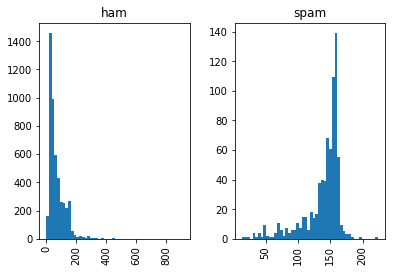

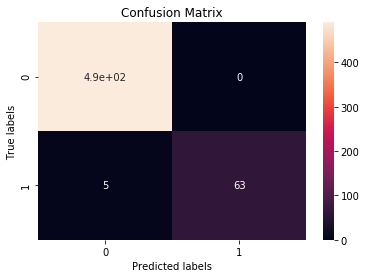

In [31]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import nltk
# import  matplotlib.pyplot as plt

# data = pd.read_csv("/media/piyush/Disk/Code practice/SPAM_Detction/spam.csv",encoding ='latin-1')
# data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1)
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})

data['length'] = data['text'].apply(len)
#
from nltk import stem
from nltk.corpus import stopwords

plt.figure()
data.hist(column = "length", by = 'label', bins = 50)



def message_lower(msg):
    msg = msg.lower()
    return msg


stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))


data['text'] = data['text'].apply(message_lower)



from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =  train_test_split(data['text'],data['label'], test_size=0.1, random_state= 1)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)


from sklearn.svm import SVC
svm = SVC(C = 3000)
svm.fit(X_train,y_train)

X_test = vectorizer.transform((X_test))
y_pred = svm.predict(X_test)

from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test,y_pred))

plt.figure()
ax= plt.subplot()
t = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

